# Analysis of Arsenal's corners so far in the WSL in 2025/26

In [169]:
import pandas as pd
import mplsoccer
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.patches import FancyArrowPatch

This data was collected by hand, watching games on YouTube. See later cells for a definition of the target location.

In [139]:
corners = pd.read_csv("data/corners.csv")
corners

,Video link,Game,Ground pass,Group,ID,Minute,Outcome,Side,Swing,Target location
0,https://www.youtube.com/live/ybQDwsrwIfg?si=VT...,Brighton (H),Yes,NaN,COR-1,104,Recycled,Right,NaN,Corner R
1,https://www.youtube.com/live/ybQDwsrwIfg?si=uw...,Brighton (H),Yes,Left front post,COR-2,91,Cleared,Left,Inswinger,A1
2,https://www.youtube.com/live/ybQDwsrwIfg?si=ad...,Brighton (H),No,Right front post,COR-3,79,Woodwork,Right,Inswinger,B5
3,https://www.youtube.com/live/ybQDwsrwIfg?si=4k...,Brighton (H),Yes,Left front post,COR-4,63,Cleared,Left,Inswinger,A1
4,https://www.youtube.com/live/ybQDwsrwIfg?si=Rs...,Brighton (H),Yes,NaN,COR-5,58,Saved,Right,NaN,Corner R
5,https://www.youtube.com/live/ybQDwsrwIfg?si=aM...,Brighton (H),No,Right front post,COR-6,57,Saved,Right,Inswinger,B4
6,https://www.youtube.com/live/ybQDwsrwIfg?si=kN...,Brighton (H),Yes,Left front post,COR-7,48,Cleared,Left,Inswinger,A1
7,https://www.youtube.com/live/ybQDwsrwIfg?si=d_...,Brighton (H),Yes,Left front post,COR-8,48,Turnover,Left,Inswinger,6L out
8,https://www.youtube.com/live/ybQDwsrwIfg?si=Wt...,Brighton (H),No,Left back post,COR-9,46,No connection,Left,Inswinger,C4
9,https://www.youtube.com/live/ybQDwsrwIfg?si=Sv...,Brighton (H),No,NaN,COR-10,10,Cleared,Left,Inswinger,A5


Corner zones are defined below. I've used a much finer grid in the goalmouth so that there's only ever a couple of players at one time, which makes it easy to calculate a ball-win probability if the ball lands in that zone. 

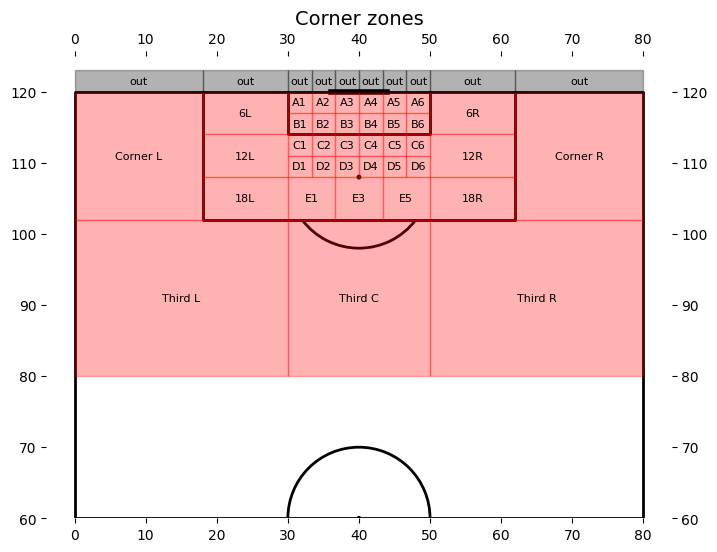

In [167]:
# Define and plot corner zones
fig, ax = plt.subplots(figsize=(10, 6))
pitch = mplsoccer.VerticalPitch(
    pitch_type="statsbomb",
    pitch_color="white",
    line_color="black",
    half=True,
    label=True,
    tick=True,
)
pitch.draw(ax=ax)

corner_zones = pd.DataFrame(
    [
        {"zone": "Corner L", "x0": 0, "x1": 18, "y0": 102, "y1": 120},
        {"zone": "Corner R", "x0": 62, "x1": 80, "y0": 102, "y1": 120},
        {"zone": "6L", "x0": 18, "x1": 30, "y0": 114, "y1": 120},
        {"zone": "12L", "x0": 18, "x1": 30, "y0": 108, "y1": 114},
        {"zone": "18L", "x0": 18, "x1": 30, "y0": 102, "y1": 108},
        {"zone": "6R", "x0": 50, "x1": 62, "y0": 114, "y1": 120},
        {"zone": "12R", "x0": 50, "x1": 62, "y0": 108, "y1": 114},
        {"zone": "18R", "x0": 50, "x1": 62, "y0": 102, "y1": 108},
        {"zone": "A1", "x0": 30, "x1": 33.33, "y0": 117, "y1": 120},
        {"zone": "A2", "x0": 33.33, "x1": 36.66, "y0": 117, "y1": 120},
        {"zone": "A3", "x0": 36.66, "x1": 40, "y0": 117, "y1": 120},
        {"zone": "A4", "x0": 40, "x1": 43.33, "y0": 117, "y1": 120},
        {"zone": "A5", "x0": 43.33, "x1": 46.66, "y0": 117, "y1": 120},
        {"zone": "A6", "x0": 46.66, "x1": 50, "y0": 117, "y1": 120},
        {"zone": "B1", "x0": 30, "x1": 33.33, "y0": 114, "y1": 117},
        {"zone": "B2", "x0": 33.33, "x1": 36.66, "y0": 114, "y1": 117},
        {"zone": "B3", "x0": 36.66, "x1": 40, "y0": 114, "y1": 117},
        {"zone": "B4", "x0": 40, "x1": 43.33, "y0": 114, "y1": 117},
        {"zone": "B5", "x0": 43.33, "x1": 46.66, "y0": 114, "y1": 117},
        {"zone": "B6", "x0": 46.66, "x1": 50, "y0": 114, "y1": 117},
        {"zone": "C1", "x0": 30, "x1": 33.33, "y0": 111, "y1": 114},
        {"zone": "C2", "x0": 33.33, "x1": 36.66, "y0": 111, "y1": 114},
        {"zone": "C3", "x0": 36.66, "x1": 40, "y0": 111, "y1": 114},
        {"zone": "C4", "x0": 40, "x1": 43.33, "y0": 111, "y1": 114},
        {"zone": "C5", "x0": 43.33, "x1": 46.66, "y0": 111, "y1": 114},
        {"zone": "C6", "x0": 46.66, "x1": 50, "y0": 111, "y1": 114},
        {"zone": "D1", "x0": 30, "x1": 33.33, "y0": 108, "y1": 111},
        {"zone": "D2", "x0": 33.33, "x1": 36.66, "y0": 108, "y1": 111},
        {"zone": "D3", "x0": 36.66, "x1": 40, "y0": 108, "y1": 111},
        {"zone": "D4", "x0": 40, "x1": 43.33, "y0": 108, "y1": 111},
        {"zone": "D5", "x0": 43.33, "x1": 46.66, "y0": 108, "y1": 111},
        {"zone": "D6", "x0": 46.66, "x1": 50, "y0": 108, "y1": 111},
        {"zone": "E1", "x0": 30, "x1": 36.66, "y0": 102, "y1": 108},
        {"zone": "E3", "x0": 36.66, "x1": 43.33, "y0": 102, "y1": 108},
        {"zone": "E5", "x0": 43.33, "x1": 50, "y0": 102, "y1": 108},
        {"zone": "Third L", "x0": 0, "x1": 30, "y0": 80, "y1": 102},
        {"zone": "Third C", "x0": 30, "x1": 50, "y0": 80, "y1": 102},
        {"zone": "Third R", "x0": 50, "x1": 80, "y0": 80, "y1": 102},
    ]
)

out_corner_zones = pd.DataFrame(
    [
        {"zone": "Corner L out", "x0": 0, "x1": 18, "y0": 120, "y1": 123},
        {"zone": "Corner R out", "x0": 62, "x1": 80, "y0": 120, "y1": 123},
        {"zone": "6L out", "x0": 18, "x1": 30, "y0": 120, "y1": 123},
        {"zone": "6R out", "x0": 50, "x1": 62, "y0": 120, "y1": 123},
        {"zone": "A1 out", "x0": 30, "x1": 33.33, "y0": 120, "y1": 123},
        {"zone": "A2 out", "x0": 33.33, "x1": 36.66, "y0": 120, "y1": 123},
        {"zone": "A3 out", "x0": 36.66, "x1": 40, "y0": 120, "y1": 123},
        {"zone": "A4 out", "x0": 40, "x1": 43.33, "y0": 120, "y1": 123},
        {"zone": "A5 out", "x0": 43.33, "x1": 46.66, "y0": 120, "y1": 123},
        {"zone": "A6 out", "x0": 46.66, "x1": 50, "y0": 120, "y1": 123},
    ]
)

all_zones = pd.concat([corner_zones, out_corner_zones], ignore_index=True)

for _, row in corner_zones.iterrows():
    ax.add_patch(
        plt.Rectangle(
            (row["x0"], row["y0"]),
            row["x1"] - row["x0"],
            row["y1"] - row["y0"],
            color="red",
            alpha=0.3,
        )
    )
    ax.text(
        (row["x0"] + row["x1"]) / 2,
        (row["y0"] + row["y1"]) / 2,
        row["zone"],
        color="black",
        ha="center",
        va="center",
        fontsize=8,
    )

for _, row in out_corner_zones.iterrows():
    ax.add_patch(
        plt.Rectangle(
            (row["x0"], row["y0"]),
            row["x1"] - row["x0"],
            row["y1"] - row["y0"],
            color="black",
            alpha=0.3,
        )
    )
    ax.text(
        (row["x0"] + row["x1"]) / 2,
        (row["y0"] + row["y1"]) / 2,
        "out",
        color="black",
        ha="center",
        va="center",
        fontsize=8,
    )

ax.set_ylim(60, 125)
ax.set_title("Corner zones", fontsize=14)
plt.show()

In [163]:
def plot_corner_heatmap(
    corners_by_target_location,
    col_name,
    metric_col_name,
    all_zones,
    title="",
    ax=None,
    label=True,
):
    """
    Plots the corner target locations on a soccer pitch.

    Parameters:
    - corners_by_target_location: DataFrame with columns 'Target location' and 'Count'.
    - all_zones: DataFrame with columns 'zone', 'x0', 'x1', 'y0', 'y1'.
    """
    # Create a mapping from zone names to counts
    zone_counts = dict(
        zip(
            corners_by_target_location[col_name],
            corners_by_target_location[metric_col_name],
        )
    )

    valid_zones = all_zones["zone"].values

    # Get counts for each valid zone (0 if not present)
    counts = [zone_counts.get(zone, 0) for zone in valid_zones]

    # Create figure
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
    else:
        fig = ax.figure

    pitch = mplsoccer.VerticalPitch(
        pitch_type="statsbomb",
        pitch_color="white",
        line_color="black",
        half=True,
        line_zorder=2,
    )
    pitch.draw(ax=ax)

    # Create colormap and normalizer (using 'hot' or 'plasma' which work well on black)
    cmap = plt.cm.Reds
    norm = Normalize(vmin=0, vmax=max(counts) if counts else 1)

    # Plot each zone with color based on count
    for idx, row in all_zones.iterrows():
        zone_name = row["zone"]
        count = zone_counts.get(zone_name, 0)

        # Get color from colormap
        color = cmap(norm(count))

        ax.add_patch(
            plt.Rectangle(
                (row["x0"], row["y0"]),
                row["x1"] - row["x0"],
                row["y1"] - row["y0"],
                color=color,
                alpha=0.8,
                edgecolor="white",
                linewidth=0.5,
            )
        )

        if label:
            # Add zone label and count
            ax.text(
                (row["x0"] + row["x1"]) / 2,
                (row["y0"] + row["y1"]) / 2,
                f"{count}",
                color="black",
                ha="center",
                va="center",
                fontsize=10,
            )

    ax.set_ylim(80, 125)
    ax.set_title(title, fontsize=16, color="black", pad=20)

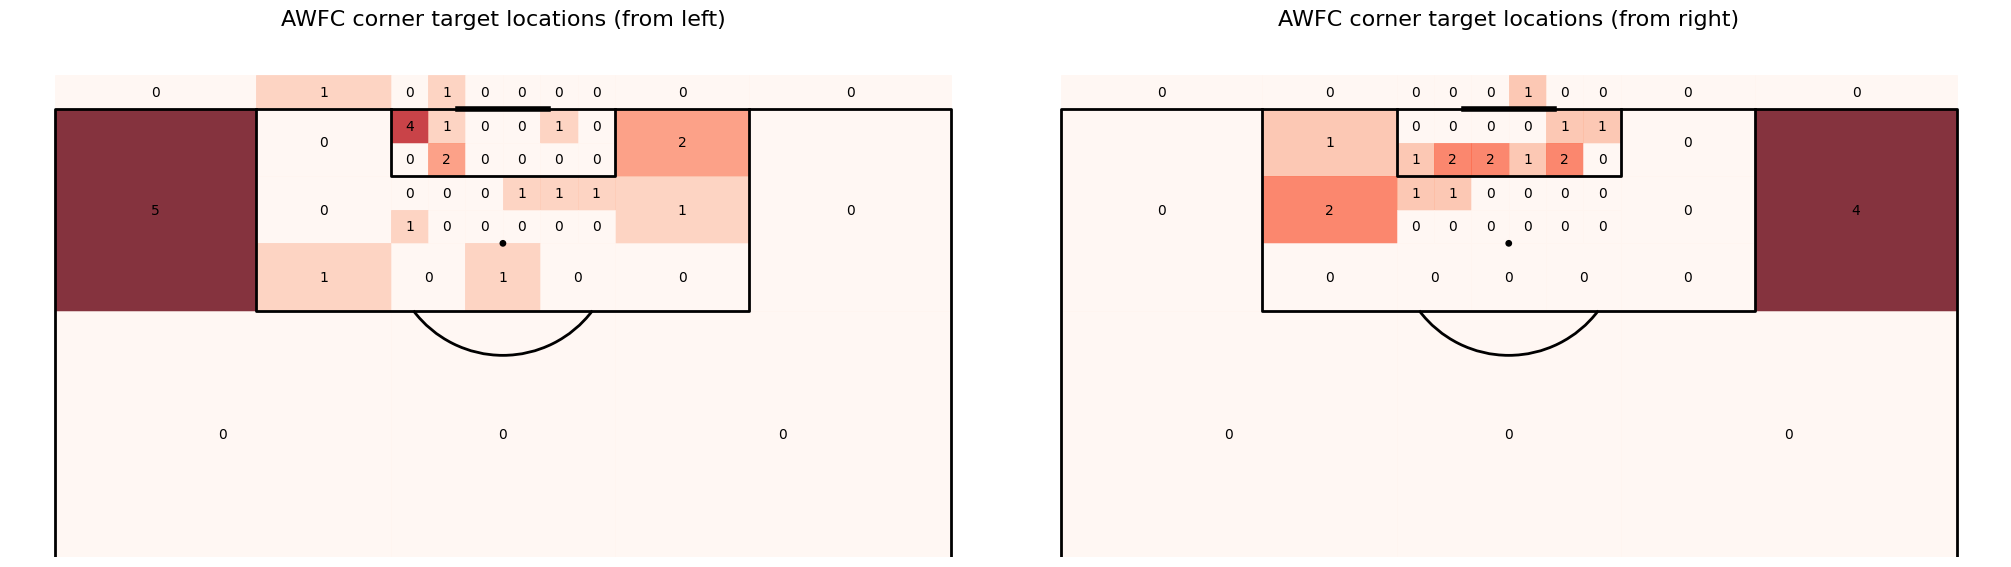

In [164]:
left_corners = corners[corners["Side"] == "Left"]
right_corners = corners[corners["Side"] == "Right"]

fig, ax = plt.subplots(ncols=2, figsize=(20, 8), constrained_layout=True)

plot_corner_heatmap(
    left_corners.groupby("Target location")["Target location"]
    .count()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending=False),
    col_name="Target location",
    metric_col_name="Count",
    all_zones=all_zones,
    title="AWFC corner target locations (from left)",
    ax=ax[0],
)
plot_corner_heatmap(
    right_corners.groupby("Target location")["Target location"]
    .count()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending=False),
    col_name="Target location",
    metric_col_name="Count",
    all_zones=all_zones,
    title="AWFC corner target locations (from right)",
    ax=ax[1],
)

In [143]:
players = pd.read_csv("data/players.csv")
players

,Name,Corner ID,Corner group,Corners,End location,ID,Marking,Player name,Role,Start location
0,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,A1,PLYR-1,Stepped in front,Caitlin Foord,Flick target,B3
1,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,A3,PLYR-2,Stepped in front,Alessia Russo,Shot target,C4
2,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,B3,PLYR-3,Stepped in front,Katie Reid,Shot target,D3
3,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,C2,PLYR-4,Stepped in front,Steph Catley,Shot target,E3
4,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,D6,PLYR-5,Goal marked,Frida Maanum,Second target,E3
...,...,...,...,...,...,...,...,...,...,...
67,NaN,COR-46,Left front post,https://youtu.be/bnbw1Ozc_2M?si=nqmfk5GxFnezj1...,e5,PLYR-68,Free,Victoria Pelova,Mop up,Third C
68,NaN,COR-46,Left front post,https://youtu.be/bnbw1Ozc_2M?si=nqmfk5GxFnezj1...,Third C,PLYR-69,Watched zonally,Emily Fox,Mop up,Third C
69,NaN,COR-46,Left front post,https://youtu.be/bnbw1Ozc_2M?si=nqmfk5GxFnezj1...,E1,PLYR-70,Watched zonally,Kim Little,Mop up,Third L
70,NaN,COR-46,Left front post,https://youtu.be/bnbw1Ozc_2M?si=nqmfk5GxFnezj1...,A3,PLYR-71,Front blocking,Olivia Smith,Blocker,B4


In [152]:
# Left front post corner group
left_front_post_players = players[players["Corner group"] == "Left front post"]


left_front_post_players_start_counts = (
    left_front_post_players.groupby("Start location")["Start location"]
    .count()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending=False)
)
left_front_post_players_end_counts = (
    left_front_post_players.groupby("End location")["End location"]
    .count()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending=False)
)

# Normalise by zone area to get density
zone_areas = {}
for _, row in all_zones.iterrows():
    area = (row["x1"] - row["x0"]) * (row["y1"] - row["y0"])
    zone_areas[row["zone"]] = area

left_front_post_players_start_counts["Density"] = (
    left_front_post_players_start_counts.apply(
        lambda row: row["Count"] / zone_areas.get(row["Start location"], 1), axis=1
    )
)
left_front_post_players_end_counts["Density"] = (
    left_front_post_players_end_counts.apply(
        lambda row: row["Count"] / zone_areas.get(row["End location"], 1), axis=1
    )
)

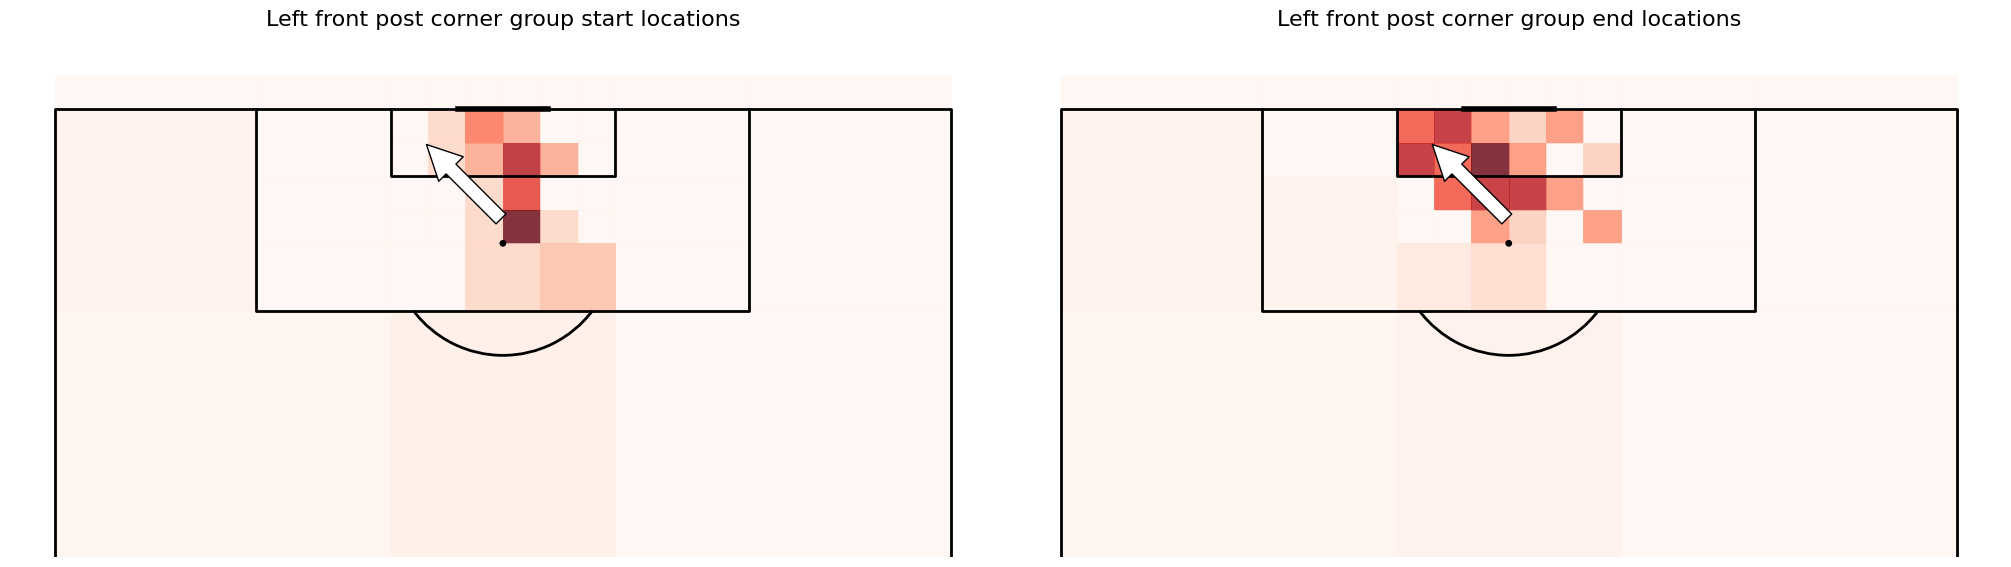

In [192]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 8), constrained_layout=True)

plot_corner_heatmap(
    left_front_post_players_start_counts,
    col_name="Start location",
    metric_col_name="Density",
    all_zones=all_zones,
    title="Left front post corner group start locations",
    ax=ax[0],
    label=False,
)

plot_corner_heatmap(
    left_front_post_players_end_counts,
    col_name="End location",
    metric_col_name="Density",
    all_zones=all_zones,
    title="Left front post corner group end locations",
    ax=ax[1],
    label=False,
)

arrow = FancyArrowPatch(
    (40, 110),
    (33, 117),
    mutation_scale=50,
    facecolor="white",
    linewidth=1,
    edgecolor="black",
    zorder=5,
)
ax[0].add_patch(arrow)

arrow_2 = FancyArrowPatch(
    (40, 110),
    (33, 117),
    mutation_scale=50,
    facecolor="white",
    linewidth=1,
    edgecolor="black",
    zorder=5,
)
ax[1].add_patch(arrow_2)